In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/img-dog/dog.jpg
/kaggle/input/catjpg/cat.jpg
/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import glob
from keras.models import Sequential
from keras.layers import activation,Flatten,MaxPooling2D,Conv2D,Dense
from keras.layers.normalization import batch_normalization
import cv2

In [6]:
from zipfile import ZipFile

dataset = '/kaggle/input/dogs-vs-cats/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
import cv2
import glob
import os

# المسار إلى مجلد الصور
image_folder = "/kaggle/working/train"

# قائمة لتخزين الصور
images = []

# قائمة لتخزين العلامات
labels = []

# قراءة الصور والعلامات
for image_path in glob.glob(os.path.join(image_folder, "*.jpg")):
    image = cv2.imread(image_path,cv2.IMREAD_COLOR)
    image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image =cv2.resize(image,(120,120))
    label = os.path.basename(image_path).split("_")[0].split('.')[0]  # افتراض أن العلامة موجودة قبل الشرطة المنخفضة
    images.append(image)
    labels.append(label)



In [8]:
np.random.RandomState(seed=42).shuffle(images)
np.random.RandomState(seed=42).shuffle(labels)

images = np.array(images)
labels = np.array(labels)

# عرض أبعاد الصور وعدد العلامات
print("Shape of images:", images.shape)
print("Number of labels:", len(labels))

Shape of images: (25000, 120, 120, 3)
Number of labels: 25000


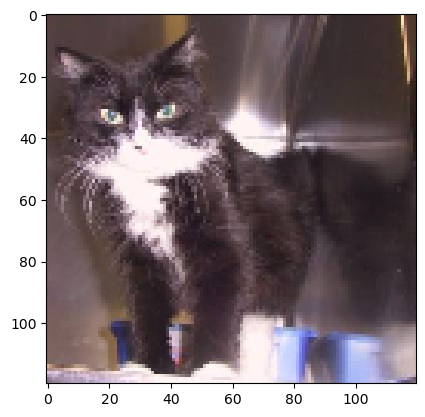

In [9]:
plt.imshow(images[10])

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,labels,random_state=42,train_size=.75)

In [10]:
x_train , x_test = x_train/255.0 ,x_test/255.0

In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:
activation='sigmoid'

feature=Sequential()
feature.add(Conv2D(32,3,activation=activation,padding='same',input_shape=(120,120,3)))
feature.add(BatchNormalization())
feature.add(MaxPooling2D())

feature.add(Conv2D(32,3,activation=activation,padding='same'))
feature.add(BatchNormalization())
feature.add(MaxPooling2D())

feature.add(Conv2D(64,3,activation=activation,padding='same'))
feature.add(BatchNormalization())
feature.add(MaxPooling2D())

feature.add(Flatten())

In [14]:
from tensorflow.keras.applications.vgg16 import VGG16
feature=VGG16(weights='imagenet',include_top=False,input_shape=(120,120,3))

for layer in feature.layers:
    layer.trainable=False

58889256/58889256 [==============================] - 2s 0us/step


In [11]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
feature=MobileNetV2(weights='imagenet',include_top=False,input_shape=(120,120,3))

for layer in feature.layers:
    layer.trainable=False

9406464/9406464 [==============================] - 0s 0us/step


In [39]:
x_rf=feature.predict(x_train)

586/586 [==============================] - 133s 227ms/step


In [41]:
x_rf=x_rf.reshape(x_rf.shape[0],-1)

[0 1]
1


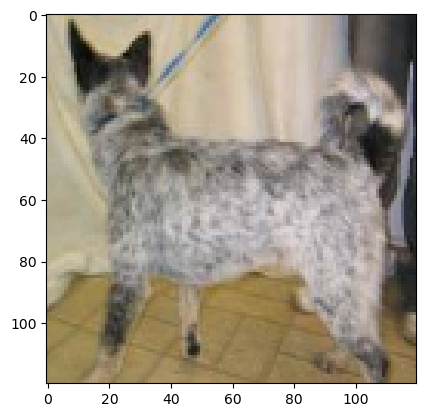

In [28]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
y_train=l.fit_transform(y_train)
y_test=l.fit_transform(y_test)
print(l.classes_)
plt.imshow(x_train[10])
print(y_train[10])

array([1, 1, 0, ..., 0, 0, 0])

In [42]:
from sklearn.ensemble import HistGradientBoostingClassifier
model=HistGradientBoostingClassifier(random_state=42)

model.fit(x_rf,y_train)

HistGradientBoostingClassifier(random_state=42)

In [43]:
x_test_rf=feature.predict(x_test)
x_test_rf=x_test_rf.reshape(x_test_rf.shape[0],-1)
prediction_rf=model.predict(x_test_rf)

196/196 [==============================] - 40s 204ms/step


In [44]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(y_test,prediction_rf)
print(acc)

0.94416


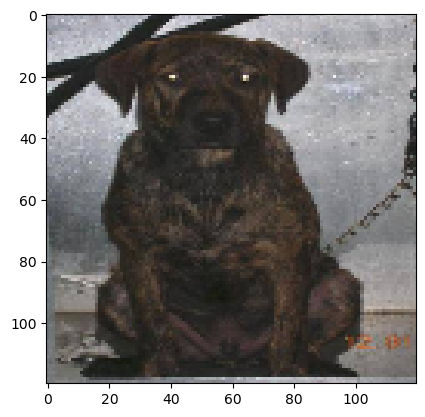

In [19]:
plt.imshow(x_test[20])

In [20]:
prediction_rf[20]

'dog'

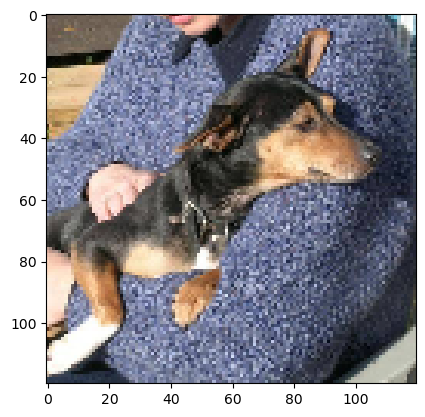

In [21]:
plt.imshow(x_test[10])

input the image path /kaggle/input/img-dog/dog.jpg


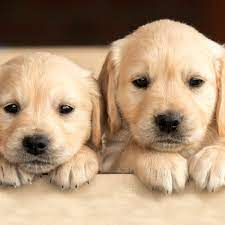

1/1 [==============================] - 0s 44ms/step
[1]
dog


In [47]:
input_img=input('input the image path')
from IPython.display import Image, display

# Specify the path to the uploaded image
image_path = input_img

# Display the image
display(Image(filename=image_path))

#for image_path in glob.glob(os.path.join(input_img, "*.jpg")):
image = cv2.imread(input_img)
image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image =cv2.resize(image,(120,120))

image =np.array(image)



image =image/255
image = np.expand_dims(image, axis=0)
x_rf=feature.predict(image)
x_rf=x_rf.reshape(x_rf.shape[0],-1)

prediction_rf=model.predict(x_rf)

print(prediction_rf)
if prediction_rf[0]==0:
    print('cat')
else:
    print('dog')

In [18]:
from zipfile import ZipFile

dataset = '/kaggle/input/dogs-vs-cats/test1.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted
